In [26]:
import pandas as pd
from scipy.spatial.distance import euclidean

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

import folium
import folium.plugins as plugins

## Collect coordinates for birth place categories

In [27]:
df = pd.read_excel('../assets/place_codes.xlsx', header=None)
df.columns = ['code', 'place']
df['code'] = df['code'].str.strip()
df['place'] = df['place'].str.strip()
df.head()

code                     place
0         A                 Antwerpen
1  Algerije                  Algerije
2  Argentië                Argentinië
3    Borneo                    Borneo
4        BR  Provincie Vlaams-Brabant

In [28]:
locator = Nominatim(user_agent="Geocoder")
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

In [29]:
df['location'] = df['place'].apply(geocode)

In [30]:
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)

In [31]:
df.head()

code                     place  \
0         A                 Antwerpen   
1  Algerije                  Algerije   
2  Argentië                Argentinië   
3    Borneo                    Borneo   
4        BR  Provincie Vlaams-Brabant   

                                            location  \
0  (Antwerpen, Vlaanderen, België / Belgique / Be...   
1  (Algérie / ⵍⵣⵣⴰⵢⴻⵔ / الجزائر, (28.0000272, 2.9...   
2            (Argentina, (-34.9964963, -64.9672817))   
3  (Borneo, Indonesia, (1.4297828, 114.7410413038...   
4  (Vlaams-Brabant, Vlaanderen, België / Belgique...   

                                   point   latitude   longitude  altitude  
0           (51.2211097, 4.3997081, 0.0)  51.221110    4.399708       0.0  
1           (28.0000272, 2.9999825, 0.0)  28.000027    2.999983       0.0  
2        (-34.9964963, -64.9672817, 0.0) -34.996496  -64.967282       0.0  
3   (1.4297828, 114.74104130383714, 0.0)   1.429783  114.741041       0.0  
4  (50.8686516, 4.7886237984620905, 0.0)  50.868652    4.788624       0.0

In [32]:
df.to_excel('../assets/places_latlon.xlsx', header=True, index=False)

## Enrich main data file

In [34]:
geo = pd.read_excel('../assets/places_latlon.xlsx', engine='openpyxl')
geo['code'] = geo['code'].str.strip()
geo = geo.set_index('code')
geo.sample(5)

place                                location  \
code                                                                     
LI           Provincie Limburg                      Limburg, Nederland   
Puerto Rico        Puerto Rico              Puerto Rico, United States   
NaN            Provincie Namen  Nieuw Namen, Hulst, Zeeland, Nederland   
ENG                   Engeland                 England, United Kingdom   
Argentië            Argentinië                               Argentina   

                                       point   latitude  longitude  altitude  
code                                                                          
LI              (51.2015196, 5.9046302, 0.0)  51.201520   5.904630         0  
Puerto Rico   (18.2247706, -66.4858295, 0.0)  18.224771 -66.485829         0  
NaN             (51.2932047, 4.1622821, 0.0)  51.293205   4.162282         0  
ENG            (52.5310214, -1.2649062, 0.0)  52.531021  -1.264906         0  
Argentië     (-34.9964963, -64.9672817, 0.0) -34.996496 -64.967282         0

In [35]:
df = pd.read_excel('../assets/Amigoregister BXL nov1879-nov1880_clean_metID.xlsx')
df.sample(10)

Rangnr intrede amigo        Amigo-écrous-boek in ASB  Rangnr boek  \
10792                  2823  Ivrognes, logés, prostitut....          797   
2980                   6772          Vagabond. et mendicité         1369   
1101                   3691  Ivrognes, logés, prostitut....         1445   
9813                  10463  Ivrognes, logés, prostitut....         6299   
9893                   9285  Ivrognes, logés, prostitut....         5441   
2138                   3413  Ivrognes, logés, prostitut....         1242   
3265                   4162  Ivrognes, logés, prostitut....         1817   
7949                   2960  Ivrognes, logés, prostitut....          905   
9155                   1108          Vagabond. et mendicité         2728   
10198                  1413          Vagabond. et mendicité         2825   

                 Naam                 Voornaam Leeftijd Geslacht  \
10792       Verbestel            Jean Baptiste       33       M    
2980         Delboven                  Georges       16        M   
1101         Cammaert                    Henri       44       M    
9813         Van Poel                     Jean       36       M    
9893   Van Streedonck                   Pierre       32       M    
2138        De Keyser                 François       42       M    
3265          Depuydt            Jean Baptiste       57       M    
7949           Renier  Josephine (veuve Copus)       49        V   
9155             Thys                     Jean       48        M   
10198    Vandenbroeck                Guillaume       23        M   

                   Motief arrestatie         Geboorteplaats code geb. plaats  \
10792  ivresse et sûreté personnelle              Bruxelles              BXL   
2980                     vagabondage              Bruxelles              BXL   
1101            une nuit sur demande              Bruxelles              BXL   
9813            une nuit sur demande                  Alost               OV   
9893     ivresse et sûreté personnel            Waesmunster               OV   
2138   ivresse et sûreté personnelle  Berchem Sainte Agathe              BXL   
3265            une nuit sur demande           Saint Gilles              BXL   
7949   ivresse et sûreté personnelle              Bruxelles              BXL   
9155                     vagabondage                  Heers               LI   
10198                    vagabondage              Bruxelles              BXL   

      datum binnen Voorvoegsel straat      Straatnaam  Woonplaats  \
10792    6/02/1880                rue  Saint Martin 54        NaN   
2980    19/06/1880                NaN              NaN  sans fixe   
1101     6/03/1880                NaN              NaN        NaN   
9813    10/10/1880                NaN              NaN        NaN   
9893    14/09/1880               rue      De Putter 27        NaN   
2138    25/02/1880                NaN              NaN        NaN   
3265    24/03/1880                NaN              NaN        NaN   
7949    11/02/1880                rue    Berchmans 137        NaN   
9155    10/12/1879                NaN              NaN  sans fixe   
10198   20/12/1879                NaN              NaN  sans fixe   

        Komende van De passage?   Beroep                   Naam Voornaam  \
10792           NaN         nee  ouvrier         Verbestel Jean Baptiste   
2980            NaN         NaN      NaN                Delboven Georges   
1101   Hoogstraeten         nee  ouvrier                  Cammaert Henri   
9813            NaN          ja      NaN                   Van Poel Jean   
9893            NaN         nee  ouvrier           Van Streedonck Pierre   
2138   Hoogstraeten         nee  ouvrier              De Keyser François   
3265            NaN          ja  ouvrier           Depuydt Jean Baptiste   
7949            NaN         nee  ouvrier  Renier Josephine (veuve Copus)   
9155            NaN         NaN      NaN                       Thys Jean   
10198           NaN 

In [36]:
lats, lons, distances = [], [], []
ref = (50.8466, 4.3519) # city hall Brussels
for code in df['code geb. plaats']:
    lat, lon, dist = None, None, None
    try:
        lat, lon = geo.loc[code.strip(), ['latitude', 'longitude']]
        dist = euclidean([lat, lon], ref)
    except AttributeError:
        pass
    lats.append(lat)
    lons.append(lon)
    distances.append(dist)

df['latitude'] = lats
df['longitude'] = lons
df['distance'] = distances

In [37]:
df_place = df[~df['latitude'].isna()]

In [38]:
map1 = folium.Map(
    tiles='cartodbpositron',
    zoom_start=12,
)
df_place.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(map1), axis=1)
map1

In [39]:
folium_map = folium.Map(tiles='CartoDB dark_matter')
plugins.FastMarkerCluster(data=list(zip(df_place['latitude'].values, df_place['longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

<AxesSubplot:ylabel='Density'>

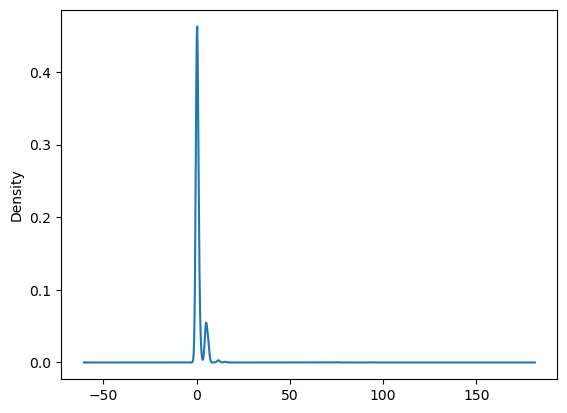

In [40]:
df['distance'].plot.kde()

In [41]:
df.to_excel('amigo.xlsx', index=False, header=True)